<a href="https://colab.research.google.com/github/NaumanAnwar97/Unsupervised-Learning/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project**

## **MS Business Analytics**
### Nauman Anwar (i220123)
### Waleed Abbas (i220125)

### Dec, 2023



# About the Dataset

 The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a taxonomy, or grouping, for personality traits. When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". This theory is based therefore on the association between words but not on neuropsychological experiments. This theory uses descriptors of common language and therefore suggests five broad dimensions commonly used to describe the human personality and psyche.

 # The Dataset
This dataset contains 1,015,342 questionnaire answers collected online by Open Psychometrics.

# Theory Explaination

## Five Personality Traits (OCEAN)
Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:



*   Openness to experience (inventive/curious vs. consistent/cautious)
*   Conscientiousness (efficient/organized vs. easy-going/careless)
*   Extroversion (outgoing/energetic vs. solitary/reserved)
*   Agreeableness (friendly/compassionate vs. challenging/detached)
*   Neuroticism (sensitive/nervous vs. secure/confident)

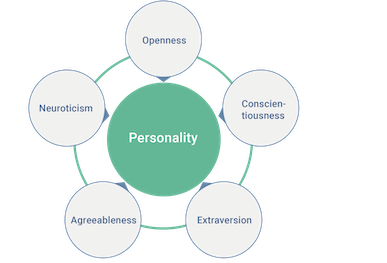

Loading Dataset

In [ ]:
import pandas as pd

# Provide the full path to your CSV file
# file_path = r'C:\Users\PMLS\Downloads\data-final.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/data-final.csv', delimiter='\t')

Importing Required Libraries

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df.drop(df.columns[50:107], axis=1, inplace=True)
df.drop(df.columns[51:], axis=1, inplace=True)

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4,1,5,2,5,1,5,2,4,1,...,1,4,1,4,1,5,3,4,5,GB
1,3,5,3,4,3,3,2,5,1,5,...,2,4,2,3,1,4,2,5,3,MY
2,2,3,4,4,3,2,1,3,2,5,...,1,2,1,4,2,5,3,4,4,GB
3,2,2,2,3,4,2,2,4,1,4,...,2,5,2,3,1,4,4,3,3,GB
4,3,3,3,3,5,3,3,5,3,4,...,1,5,1,5,1,5,3,5,5,KE


Information on features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15332 entries, 0 to 15331
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EXT1     15332 non-null  int64 
 1   EXT2     15332 non-null  int64 
 2   EXT3     15332 non-null  int64 
 3   EXT4     15332 non-null  int64 
 4   EXT5     15332 non-null  int64 
 5   EXT6     15332 non-null  int64 
 6   EXT7     15332 non-null  int64 
 7   EXT8     15332 non-null  int64 
 8   EXT9     15332 non-null  int64 
 9   EXT10    15332 non-null  int64 
 10  EST1     15332 non-null  int64 
 11  EST2     15332 non-null  int64 
 12  EST3     15332 non-null  int64 
 13  EST4     15332 non-null  int64 
 14  EST5     15332 non-null  int64 
 15  EST6     15332 non-null  int64 
 16  EST7     15332 non-null  int64 
 17  EST8     15332 non-null  int64 
 18  EST9     15332 non-null  int64 
 19  EST10    15332 non-null  int64 
 20  AGR1     15332 non-null  int64 
 21  AGR2     15332 non-null  int64 
 22

Removing NA values

In [ ]:
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 15328


In [ ]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,...,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000,15328.000000
mean,2.679802,2.767289,3.335073,3.136482,3.304671,2.451461,2.812370,3.412056,2.998956,3.567393,...,3.594337,2.168580,3.965749,2.100404,3.736039,1.941219,3.931628,3.104384,4.039796,3.886026
std,1.256197,1.328306,1.206133,1.230590,1.267950,1.236710,1.379282,1.263886,1.342112,1.303552,...,1.145043,1.120181,1.092004,1.093957,0.991055,1.119063,1.008101,1.236158,1.049183,1.039755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Participants' Nationality Distriution

In [ ]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')

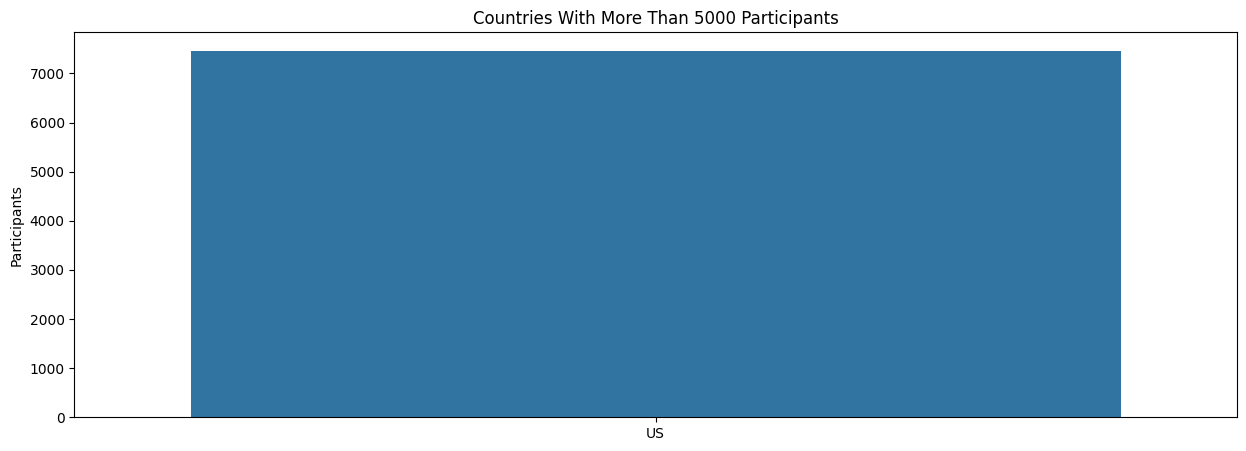

In [ ]:
# Participants' nationality distriution
# Participants' nationality distriution
countries = pd.DataFrame(df['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
y_axis = df.country.count
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

From the above bar-chart we can see that United States (US) has the highest number of participants followed by Great Britian (GB) and Canada (CA). While Italy (IT) has the lowest number of participants in this research study.

The questionaire was designed to measure the 5 dimensions of personality. Each question group comprises of 10 questions that measures each dimension.

### Measured on a Likert-Scale

### The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.


In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

# Exploratory Data Analysis (EDA)



In [ ]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

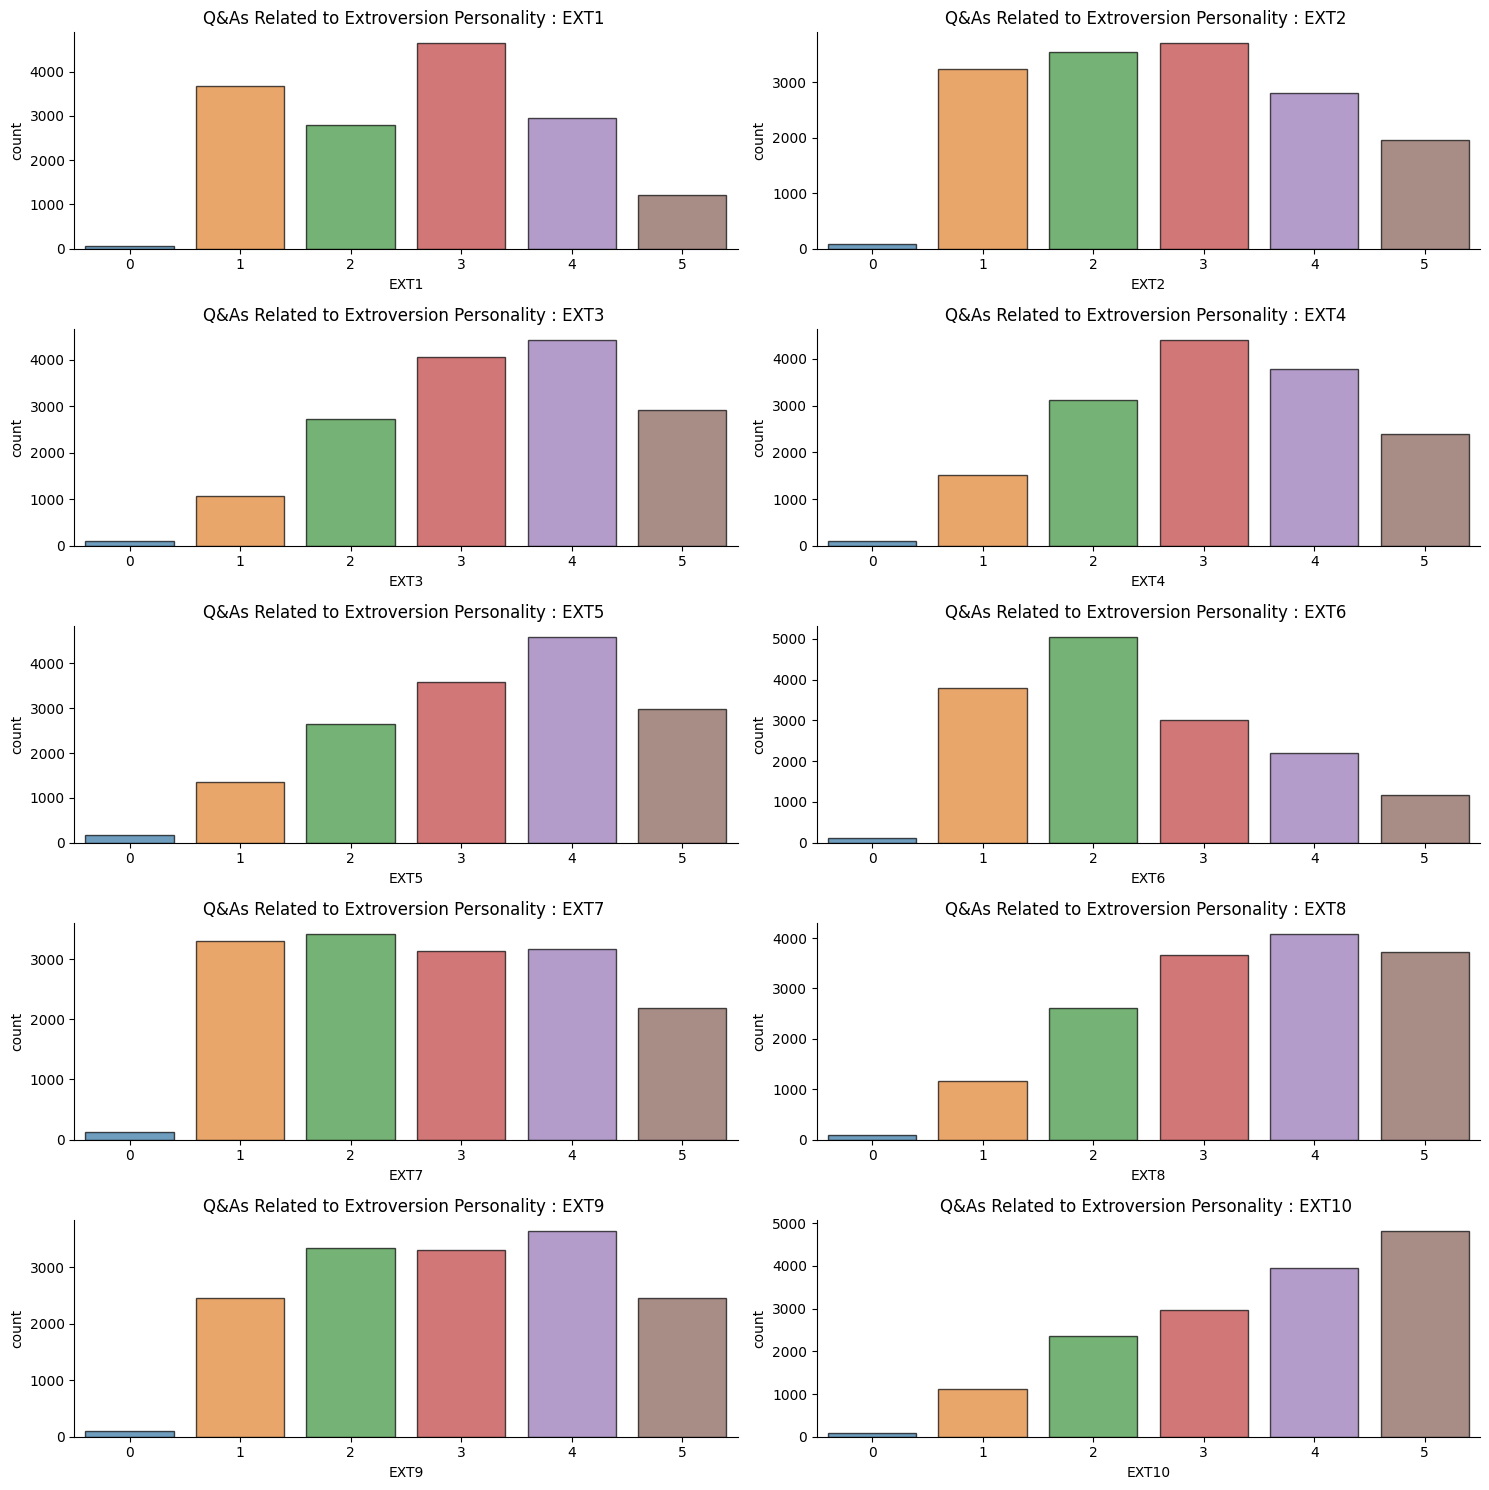

In [ ]:
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

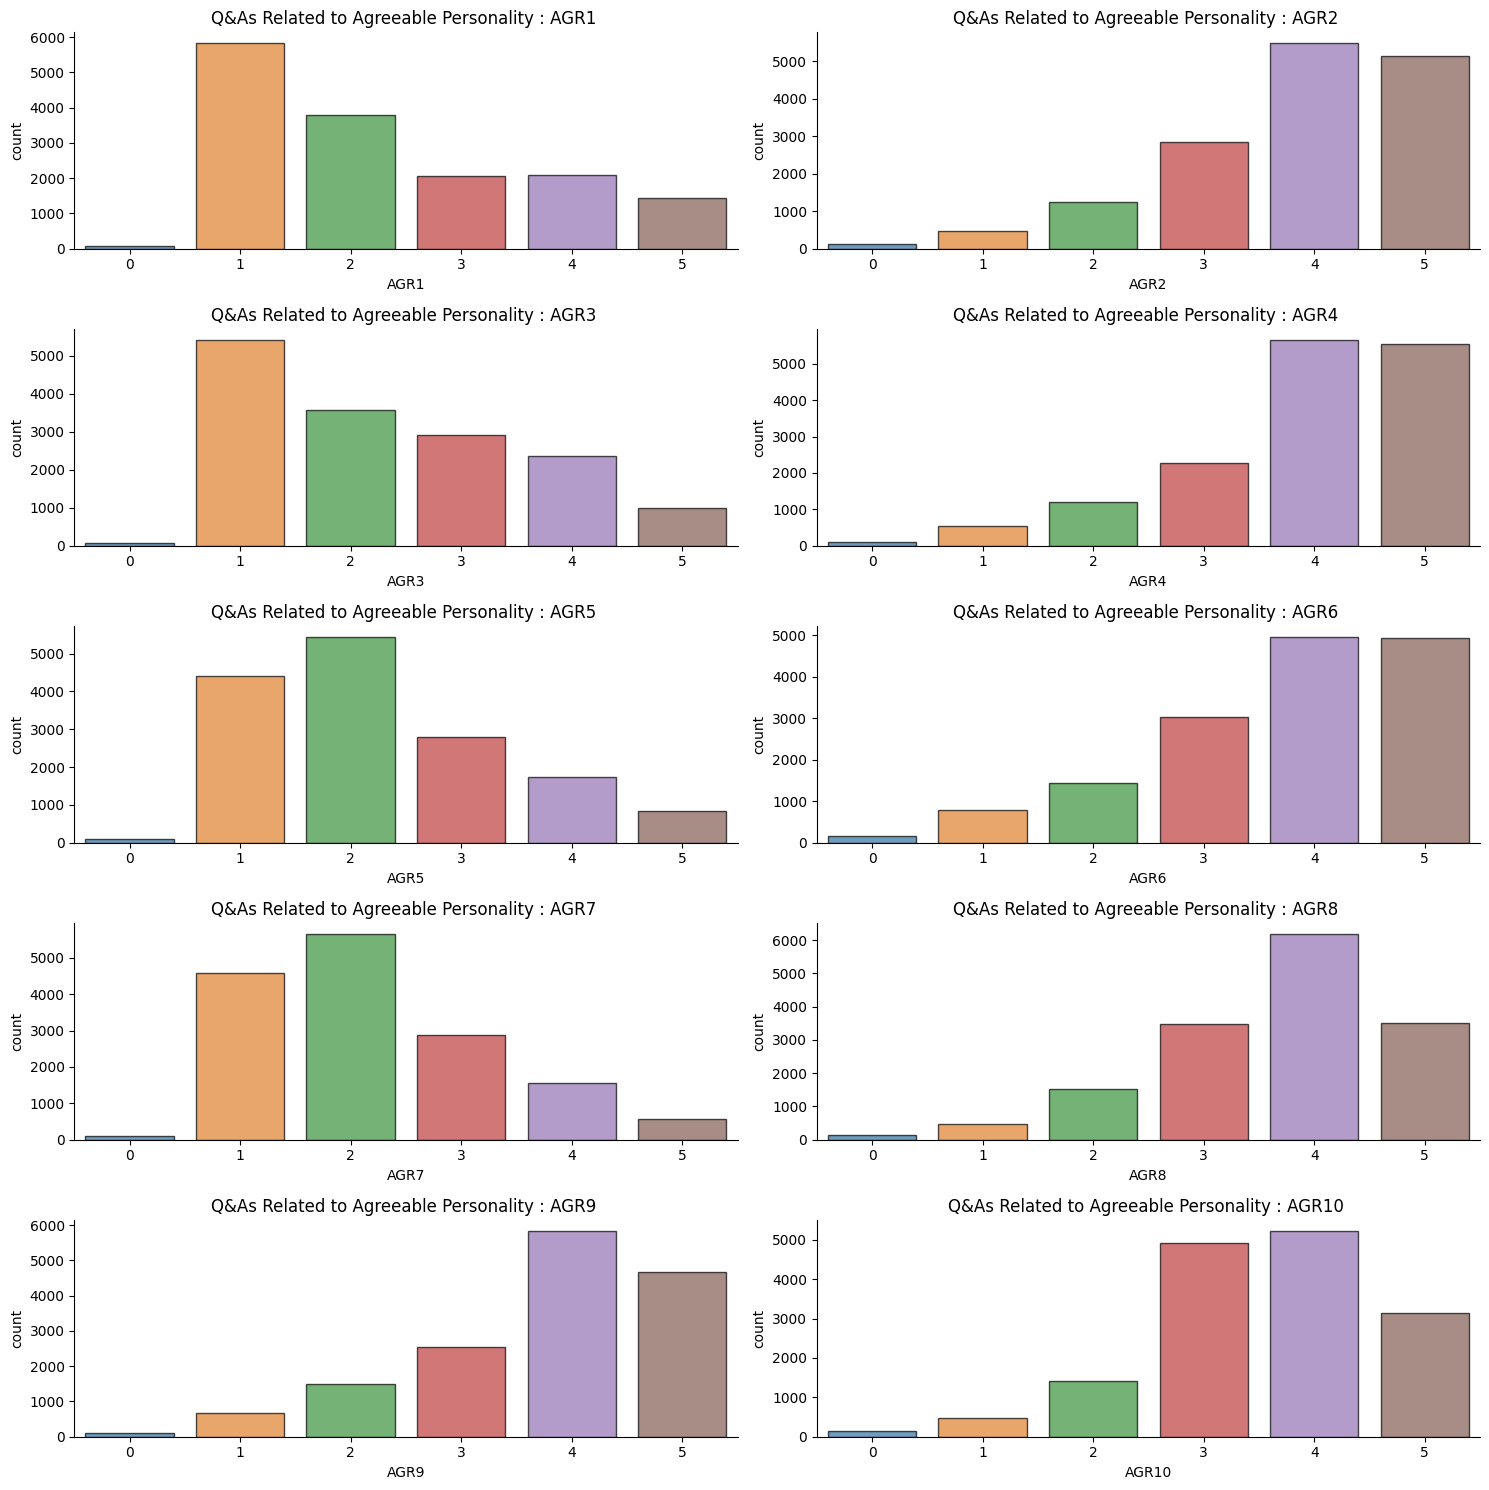

In [ ]:
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

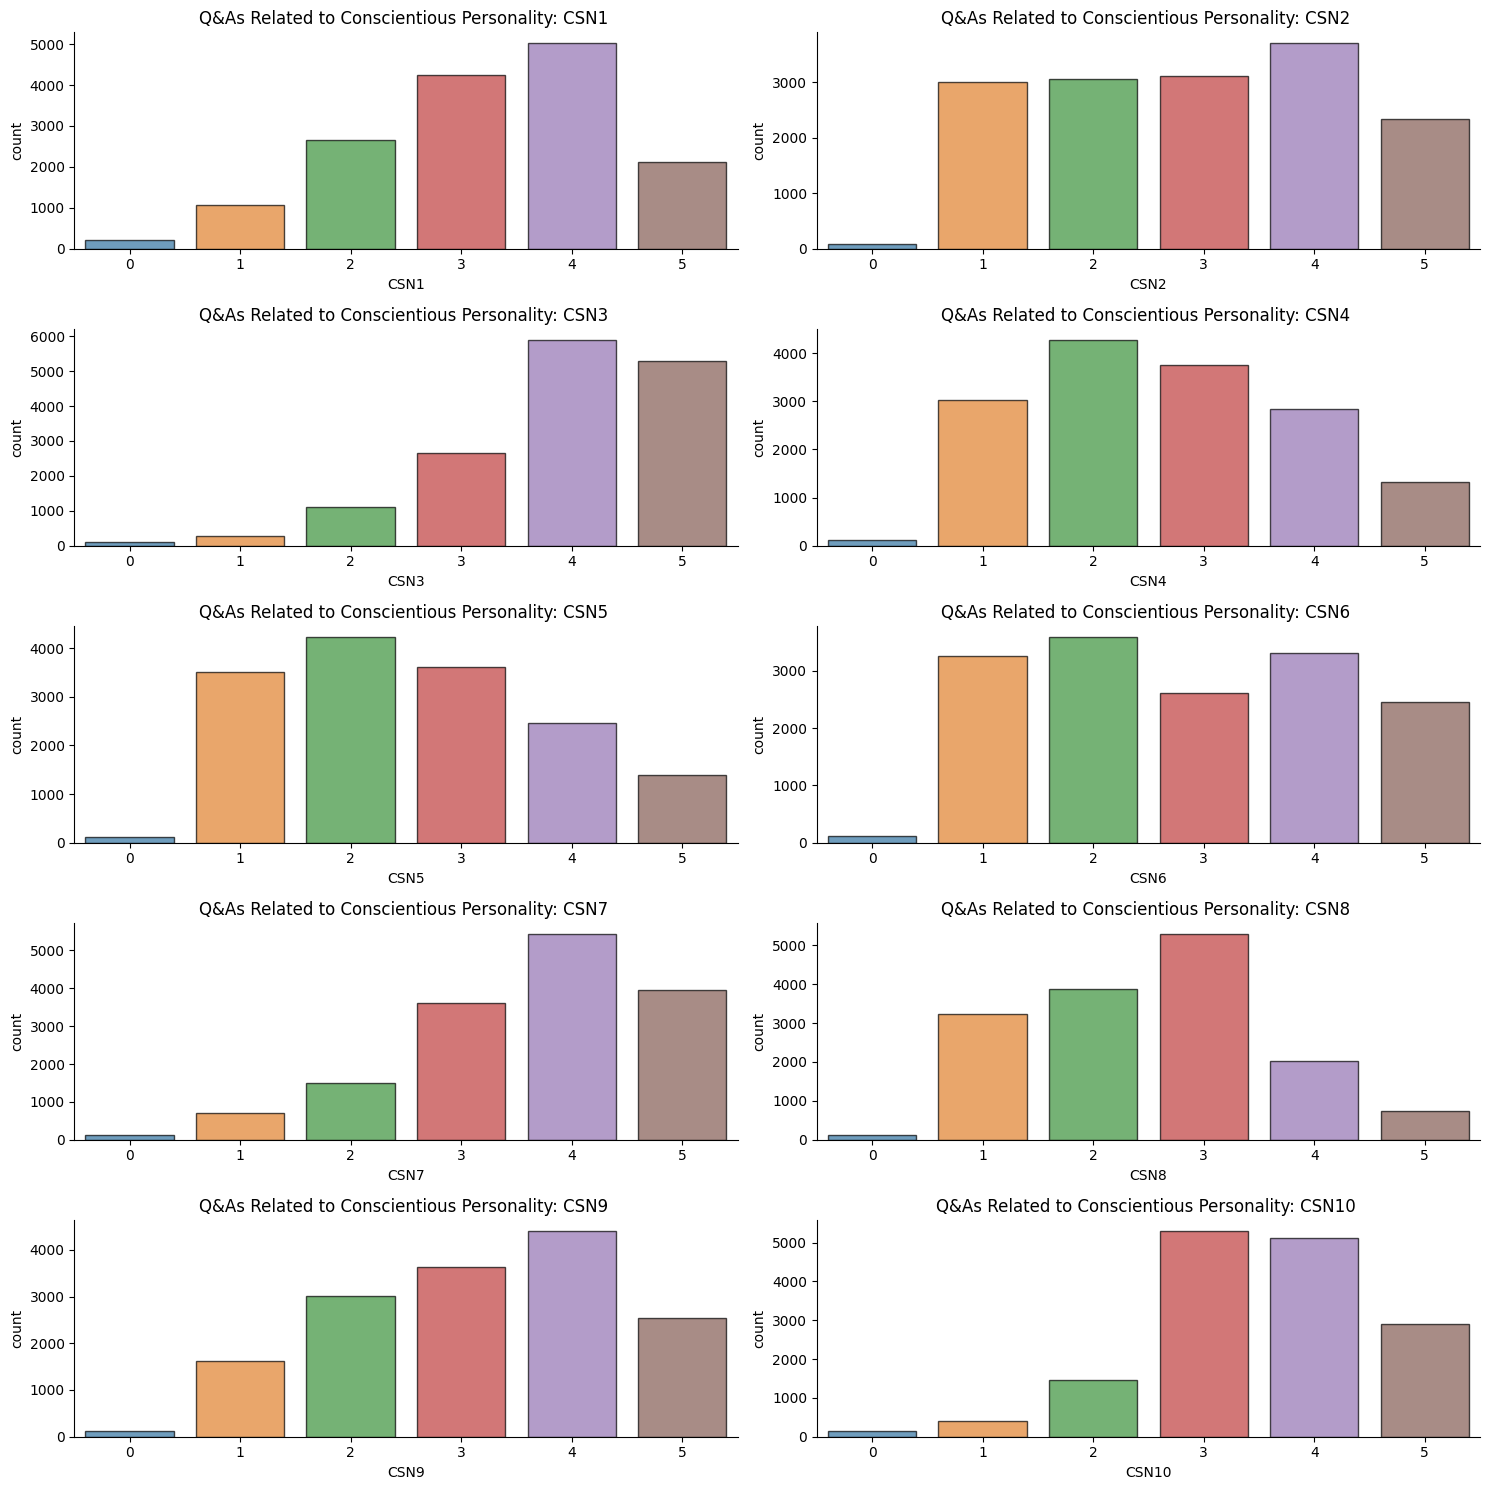

In [ ]:
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

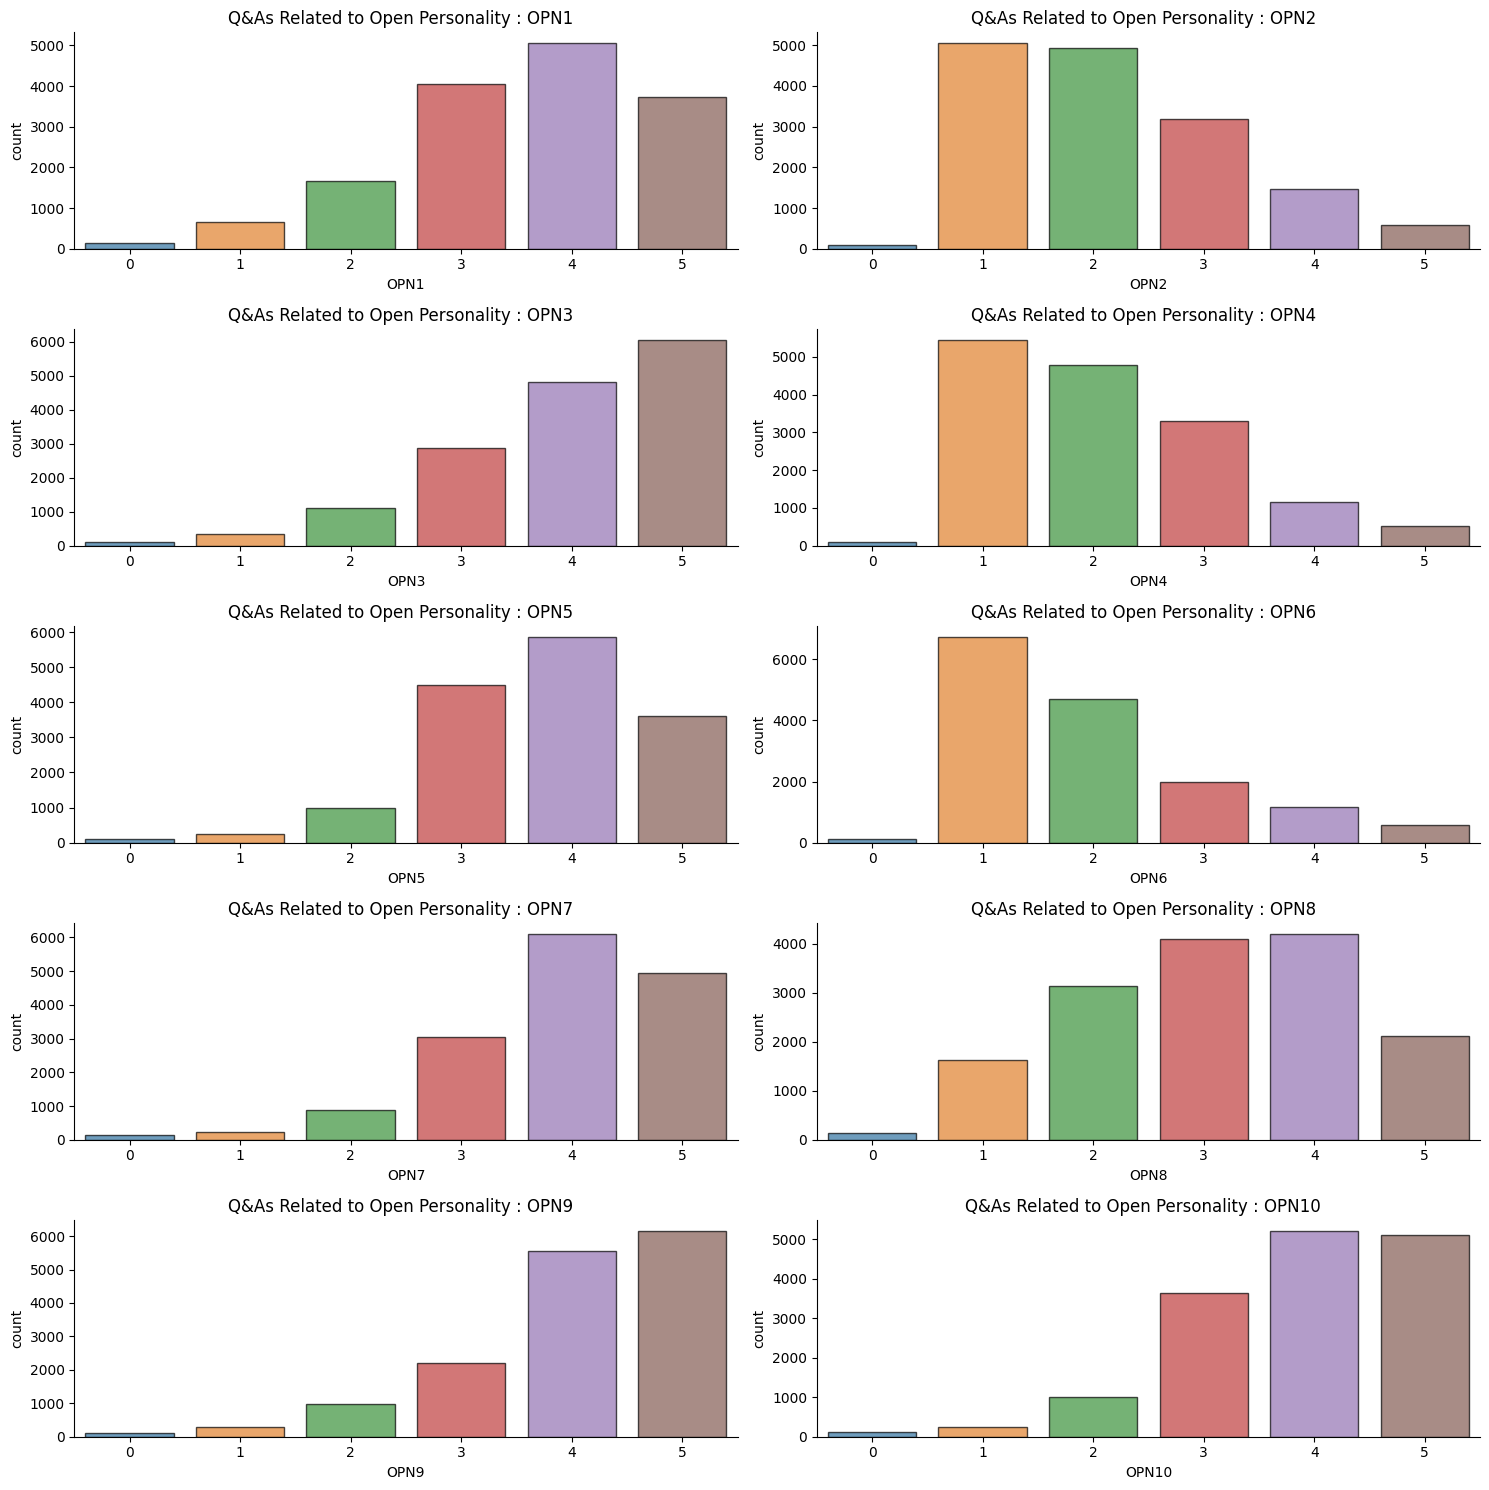

In [ ]:
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

There is some skewness in the data. In some questions for example in OPN7, the response is more inclined towards 5.0 (Agree).

### Therefore, we have scaled the data between 0-1 for the ease of calculations.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = df.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df

## Visualizing the Optimal Number of Clusters for K-Means Clustering.

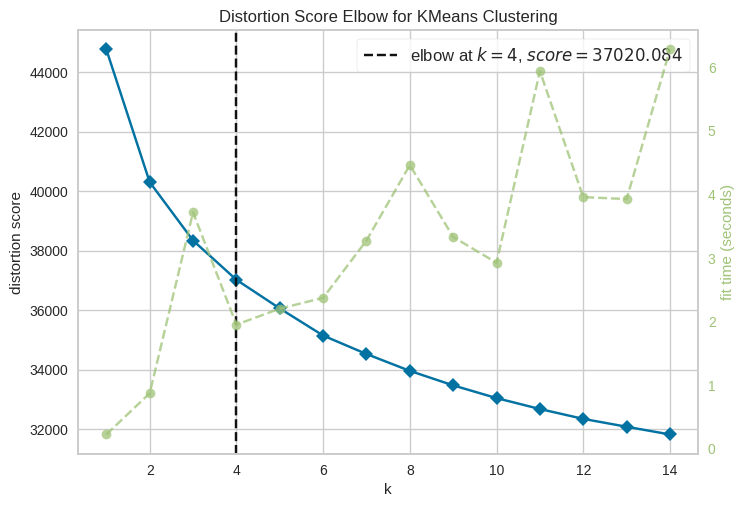

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

## **As you can see 6 clusters looks optimum for the data set**

## Clustering Participants into 6 Personality Groups using K-Means.

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = df

# I define 6 clusters and fit my model
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(df_model)

In [ ]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,5
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,2
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,2
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,1
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,5


# Analysing the Model and Predictions
How many individual do we have for each cluster?

In [ ]:
df_model.Clusters.value_counts()

0    3388
2    3247
5    3121
3    3078
1    2424
4      70
Name: Clusters, dtype: int64

### Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

In [ ]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.682054,0.388312,0.757438,0.509622,0.805077,0.381995,0.721015,0.569362,0.748347,0.624380,0.776446,0.588253,0.858264,0.479988,0.666175,0.707792,0.769008,0.701712,0.749823,0.641913,0.430874,0.852715,0.552834,0.837544,0.404014,0.795396,0.377037,0.777627,0.829516,0.767001,0.580047,0.725207,0.770248,0.656257,0.438843,0.708323,0.691558,0.570130,0.593093,0.694510,0.747580,0.436009,0.846104,0.406966,0.781936,0.361570,0.789551,0.675620,0.832586,0.827686
1,0.481601,0.649092,0.572607,0.688779,0.547607,0.583828,0.465429,0.713119,0.567162,0.774175,0.518647,0.730693,0.638201,0.589109,0.521205,0.448432,0.540099,0.463531,0.583911,0.493977,0.653878,0.602310,0.584406,0.558251,0.659983,0.541584,0.624340,0.584736,0.533498,0.613036,0.617244,0.600165,0.730941,0.542492,0.459736,0.590759,0.676403,0.558003,0.555198,0.662294,0.700660,0.449587,0.739191,0.467409,0.722442,0.438201,0.779620,0.621947,0.733333,0.735149
2,0.434986,0.656421,0.652479,0.716477,0.603819,0.537789,0.465229,0.788666,0.480012,0.813613,0.651740,0.657653,0.794580,0.549615,0.535510,0.516785,0.534031,0.438312,0.552818,0.484262,0.374684,0.795196,0.332060,0.861903,0.398953,0.820265,0.397043,0.789960,0.820819,0.738035,0.754358,0.447921,0.848168,0.395873,0.634986,0.422852,0.816015,0.411580,0.749553,0.757930,0.687650,0.441146,0.759039,0.427718,0.732800,0.406468,0.791377,0.557684,0.821682,0.743455
3,0.353931,0.742430,0.453866,0.824042,0.460039,0.657245,0.343535,0.824366,0.435153,0.900910,0.849513,0.505068,0.904224,0.437297,0.712930,0.777518,0.798895,0.744250,0.801040,0.778817,0.493112,0.679402,0.517089,0.776803,0.502729,0.772385,0.532684,0.687264,0.741326,0.603834,0.572775,0.638272,0.768096,0.679662,0.431904,0.670955,0.721118,0.606823,0.574854,0.662248,0.691943,0.485965,0.807667,0.442040,0.677973,0.423392,0.730604,0.619168,0.850357,0.726901
4,0.262857,0.260000,0.202857,0.114286,0.117143,0.051429,0.020000,0.034286,0.008571,0.022857,0.225714,0.205714,0.122857,0.088571,0.068571,0.011429,0.022857,0.031429,0.008571,0.008571,0.248571,0.320000,0.131429,0.142857,0.057143,0.040000,0.008571,0.005714,0.008571,0.008571,0.277143,0.188571,0.148571,0.074286,0.062857,0.034286,0.022857,0.005714,0.025714,0.022857,0.268571,0.171429,0.160000,0.085714,0.051429,0.011429,0.031429,0.008571,0.008571,0.042857
5,0.710285,0.371548,0.877924,0.431977,0.862224,0.330984,0.795002,0.545274,0.764114,0.489523,0.472605,0.758988,0.633194,0.651458,0.445562,0.392118,0.438577,0.348029,0.441397,0.340724,0.399808,0.893816,0.375136,0.844793,0.367895,0.770779,0.313553,0.811407,0.820827,0.834092,0.728613,0.532522,0.828196,0.393720,0.617494,0.474463,0.759821,0.405703,0.708939,0.765332,0.770971,0.365524,0.812945,0.375457,0.827619,0.333227,0.854662,0.641781,0.801025,0.856264


### Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

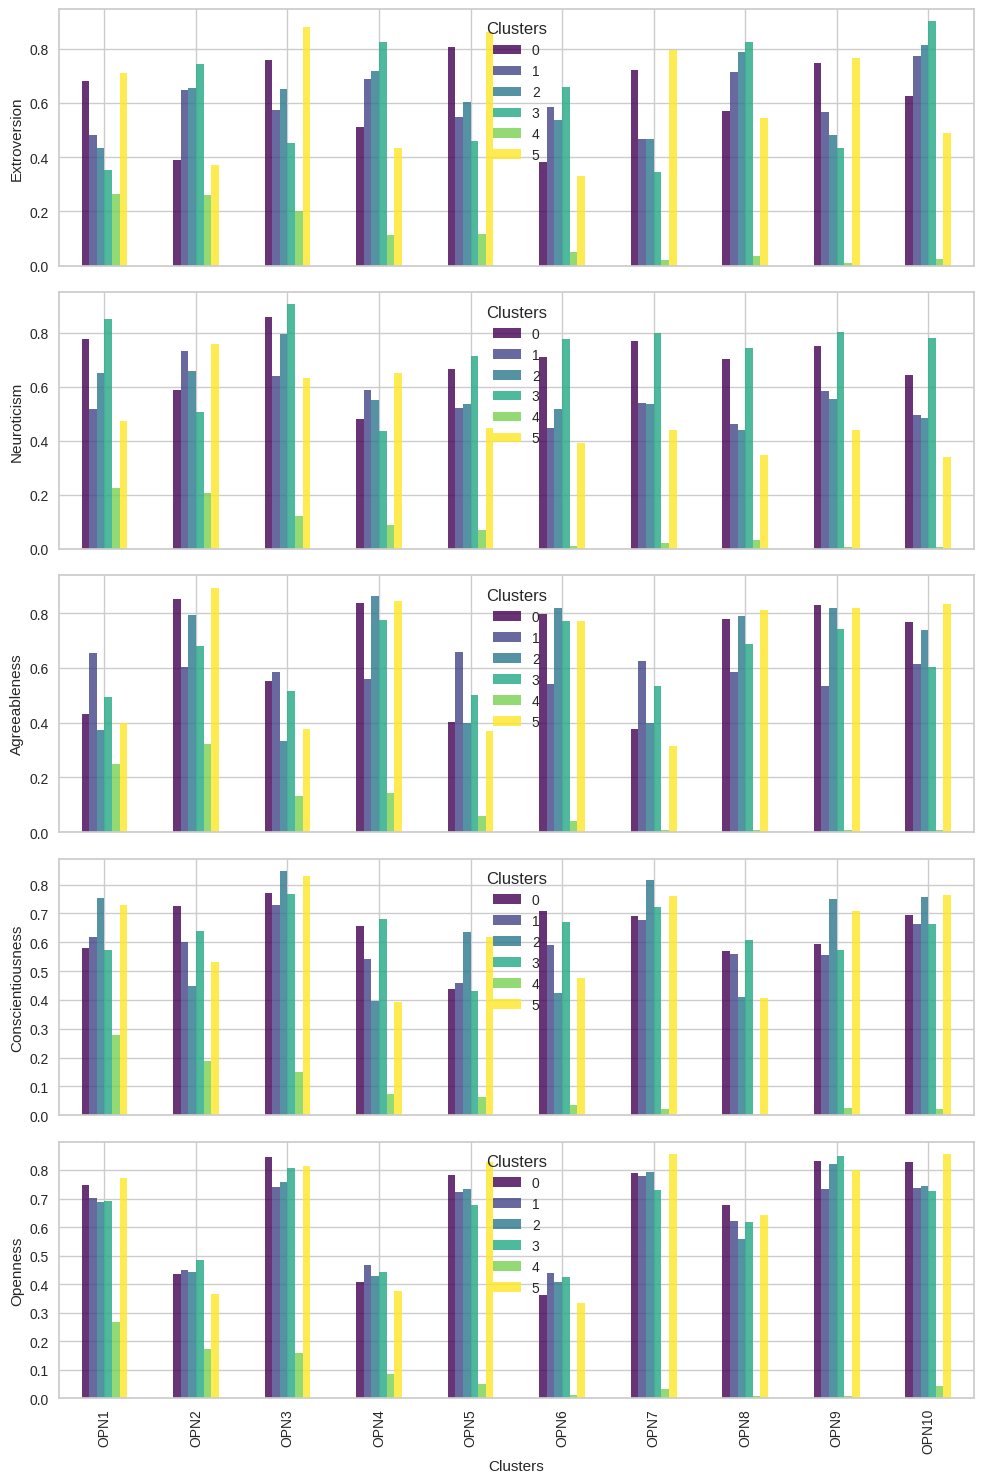

In [ ]:
abs# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

import pandas as pd
import matplotlib.pyplot as plt

# Extracting columns for each personality trait
extroversion_traits = df[ext]
neuroticism_traits = df[est]
agreeableness_traits = df[agr]
conscientiousness_traits = df[csn]
openness_traits = df[opn]

# Adding the 'Clusters' column to the selected traits DataFrames
extroversion_traits['Clusters'] = df['Clusters']
neuroticism_traits['Clusters'] = df['Clusters']
agreeableness_traits['Clusters'] = df['Clusters']
conscientiousness_traits['Clusters'] = df['Clusters']
openness_traits['Clusters'] = df['Clusters']

# Calculating mean scores for each trait within each cluster
extroversion_means = extroversion_traits.groupby('Clusters').mean()
neuroticism_means = neuroticism_traits.groupby('Clusters').mean()
agreeableness_means = agreeableness_traits.groupby('Clusters').mean()
conscientiousness_means = conscientiousness_traits.groupby('Clusters').mean()
openness_means = openness_traits.groupby('Clusters').mean()

# Plotting the results
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Plotting Extroversion
extroversion_means.T.plot(kind='bar', ax=axes[0], colormap='viridis', alpha=0.8)
axes[0].set_ylabel('Extroversion')

# Plotting Neuroticism
neuroticism_means.T.plot(kind='bar', ax=axes[1], colormap='viridis', alpha=0.8)
axes[1].set_ylabel('Neuroticism')

# Plotting Agreeableness
agreeableness_means.T.plot(kind='bar', ax=axes[2], colormap='viridis', alpha=0.8)
axes[2].set_ylabel('Agreeableness')

# Plotting Conscientiousness
conscientiousness_means.T.plot(kind='bar', ax=axes[3], colormap='viridis', alpha=0.8)
axes[3].set_ylabel('Conscientiousness')

# Plotting Openness
openness_means.T.plot(kind='bar', ax=axes[4], colormap='viridis', alpha=0.8)
axes[4].set_ylabel('Openness')

plt.xlabel('Clusters')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.decomposition import PCA

# Fit PCA with 10 components
pca = PCA(n_components=10)
pca_fit = pca.fit_transform(df_model)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# visualization after pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

subset_size = 10000
df_model_subset = shuffle(df_model, random_state=42).head(subset_size)

# Assuming 'df_pca' contains the clustering results
silhouette_avg = silhouette_score(df_model_subset, df_pca['Clusters'].head(subset_size))

print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with your data and a 'Clusters' column
# Also assuming that ext, est, agr, csn, opn are defined as you mentioned

# Define the major areas
areas = {'Extroversion': ext, 'Neuroticism': est, 'Agreeableness': agr, 'Conscientiousness': csn, 'Openness': opn}

# Initialize an empty DataFrame for aggregated results
aggregated_means = pd.DataFrame()

# Iterate over each major area
for area_name, area_columns in areas.items():
    # Extract columns for the current area
    area_traits = df[area_columns + ['Clusters']]  # Include 'Clusters' in the selection

    # Calculate mean scores for each trait within each cluster for the current area
    area_means = area_traits.groupby('Clusters').mean()

    # Aggregate mean scores across traits for the current area
    aggregated_means[area_name] = area_means.mean(axis=1)

# Plotting the aggregated results
plt.figure(figsize=(10, 6))
aggregated_means.T.plot(kind='bar', colormap='viridis', alpha=0.8)  # Transpose for better visualization
plt.xlabel('Major Areas')
plt.ylabel('Mean Score')
plt.title('Aggregated Results for Major Areas')
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with your data and a 'Clusters' column
# Also assuming that ext, est, agr, csn, opn are defined as you mentioned

# Define the major areas
areas = {'Extroversion': ext, 'Neuroticism': est, 'Agreeableness': agr, 'Conscientiousness': csn, 'Openness': opn}

# Initialize an empty DataFrame for aggregated results
aggregated_means = pd.DataFrame()

# Iterate over each major area
for area_name, area_columns in areas.items():
    # Extract columns for the current area
    area_traits = df[area_columns + ['Clusters']]  # Include 'Clusters' in the selection

    # Calculate mean scores for each trait within each cluster for the current area
    area_means = area_traits.groupby('Clusters').mean()

    # Aggregate mean scores across traits for the current area
    aggregated_means[area_name] = area_means.mean(axis=1)

# Plotting the aggregated results
plt.figure(figsize=(10, 6))
aggregated_means.plot(kind='bar', colormap='viridis', alpha=0.8)
plt.xlabel('Clusters')
plt.ylabel('Mean Score')
plt.title('Aggregated Results for Major Areas')
plt.legend(title='Major Areas', loc='best', bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

sample_size = 10000
df_model_sample = df_model.sample(n=sample_size, random_state=42)

eps_value = 1.9
min_samples_value = 1000

# Create DBSCAN object and fit on the sampled data
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_clusters = dbscan.fit_predict(df_model_sample)
pca_fit_sample = pca.fit_transform(df_model_sample)

# Visualize after PCA
df_pca_dbscan = pd.DataFrame(data=pca_fit_sample)
df_pca_dbscan['Clusters'] = dbscan_clusters

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_pca_dbscan, x=df_pca_dbscan.columns[0], y=df_pca_dbscan.columns[1], hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA (DBSCAN)')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
sample_size = 10000
df_model_sample = df_model.sample(n=sample_size, random_state=42)

# Fit hierarchical clustering
hc = AgglomerativeClustering(affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(df_model_sample)

# Create linkage matrix
linkage_matrix = linkage(df_model_sample, method='ward')

# Set the number of clusters you want
num_clusters = 10

# Plot dendrogram with a cut-off threshold for the number of clusters and different colors
plt.figure(figsize=(15, 7))

# Function to assign colors to branches based on cluster labels
def assign_colors(tree, labels, colors):
    color_threshold = 1.0
    for i, (icoord, dcoord, color) in enumerate(zip(tree['icoord'], tree['dcoord'], tree['color_list'])):
        if max(dcoord) < color_threshold:
            plt.plot(icoord, dcoord, color=color)
        else:
            # Assign colors based on cluster labels
            label1 = labels[int(icoord[0] / 10)]
            label2 = labels[int(icoord[3] / 10)]
            branch_color = colors[label1] if label1 == label2 else 'gray'
            plt.plot(icoord, dcoord, color=branch_color)

# Plot the dendrogram
tree = dendrogram(linkage_matrix, truncate_mode='lastp', p=num_clusters, show_leaf_counts=True, no_plot=True)

# Assign colors to branches based on cluster labels
assign_colors(tree, hc_clusters, plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters)))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df_model_sample, hc_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# **The End**